## Import data 

In [2]:
from Bio.Seq import Seq
from Bio import SeqIO
from Bio import pairwise2
from Bio.SubsMat import MatrixInfo as matlist
from Bio.pairwise2 import format_alignment

/Users/maral/opt/anaconda3/lib/python3.8/site-packages/Bio/SubsMat/__init__.py:126: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  warnings.warn(


# Phylogenetic tree

In [3]:
#Load the sequences into MUSCLE :
#https://www.ebi.ac.uk/Tools/msa/muscle/ -- input in fasta format, output in clustalw format
#Just put the fasta file to this website - and submit
#Then download the file and save it into your document

In [12]:
# Making multiple alignment with MUSCLE

import Bio as Bio
from Bio import AlignIO
from Bio.Align.Applications import MuscleCommandline #importing the muscle

with open("muscle-I20220613-075019-0827-39204-p1m.clw","r") as aln: #downloaded file (X.clw)
    multiple_alignment = AlignIO.read(aln,"clustal") #attaching the file into a Multiple Sequence Alignment class in Biopython 
print(type(multiple_alignment))
print(multiple_alignment)
    

<class 'Bio.Align.MultipleSeqAlignment'>
Alignment with 32 rows and 676 columns
--MKQHNTVSRRDFAKYMGLGSAGLVASA-----AAAYTWSKQD...--- CAI83526.1
-----MAEVNRRDFLKAAGVGAAGLSVAA-----AGSYWNSYHE...--- CAI83191.1
MVDPQKWDLNRRDFIKKTGLASVAATAVV-----AVN--TTGII...--- CAI83563.1
-MDE---KINRRDFVKGAGLASAATVATL-----MAT--ASTVS...--- CAI82436.1
-MQGFHSALSRRDFMKGIGLTGAGFGIAA-----ATA--PVFRD...--- CAI82479.1
-MSQFHSILSRRDFMKSLGLASAGIGAASLGGVNAAA--PFFHD...--- CAI82358.1
-MAQFHSVLSRRDFMKGLGLAGAGVGAAA-----AVS--PVFRD...--- CAI83606.1
-MSQFHSIVSRRDFMKGLGLVGAGVGAAG-----AAN--PVFHD...--- CAI83558.1
-MKTFHSTLSRRDFMKALGLAGAGIGAVS-----AAA--PVFHD...--- CAI83618.1
-MKEFHSTLSRRDFMKSLGVVGAGLGTMS-----AAA--PVFHD...--- CAI83644.1
-MSNFHSTLSRRDFMKSLGVVGAGLGTLS-----AAA--PVFHD...--- CAI83480.1
-MNISHSTLSRRDFMKGLGLAGAGLGAVA-----ASA--PVFHD...--- CAI83594.1
-MSKLHSTLSRRDFMKGLGLAGAGLGAVA-----ASA--PVFHD...--- CAI83574.1
-MRTQHSTISRRDFMKGLGLTGAGIGLTA-----GAA--PVFHD...--- CAI83519.1
-MLNFHSTLTRKDFLKGIGLAGAGLGAAS-----AVT--PMFHD...--- C

In [14]:
#Distance Calculating

from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
calculator = DistanceCalculator('pam30') #general 'function' for calculating distance 
distance_matrix = calculator.get_distance(multiple_alignment) #get distances for every sequence in the multiple sequence allignment
print(distance_matrix)


CAI83526.1	0
CAI83191.1	0.6405782652043868	0
CAI83563.1	1.2577197149643706	1.2696287279367011	0
CAI82436.1	1.2602739726027397	1.3109013398294762	0.3514293964770431	0
CAI82479.1	1.3507795100222717	1.3010146561443068	1.2798463356973995	1.266231841091017	0
CAI82358.1	1.3439003679592414	1.314195037507213	1.2267825044937088	1.172465960665658	1.1106107514776244	0
CAI83606.1	1.3693409742120344	1.3095866314863676	1.2577165118369793	1.2241379310344827	1.0637142857142856	0.6884936674750741	0
CAI83558.1	1.382996872334376	1.2971478463329453	1.2688593844296923	1.230745814307458	1.0947934352009054	0.676376269374666	0.4916556291390729	0
CAI83618.1	1.2876336715108307	1.2785833798103736	1.217833632555356	1.2234837167612787	1.0562429696287965	0.8602356810084955	0.9039799610353465	0.9258544652701213	0
CAI83644.1	1.3190200935865675	1.2922297297297298	1.2225923682616595	1.2335148215366	1.0431251750210024	0.8728579325594251	0.881058495821727	0.9052369077306733	0.5406824146981628	0
CAI83480.1	1.3170933113129

In [15]:
#Tree Calculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator) #general 'function' for building a tree with the distances

#Build Tree
sequence_tree = constructor.build_tree(multiple_alignment) #building a tree for the multiple sequence alignment (computer way)
sequence_tree.rooted = True #rooted= ancestry ; unrooted= related
print(sequence_tree)


Tree(rooted=True)
    Clade(branch_length=0, name='Inner30')
        Clade(name='Inner24')
            Clade(name='Inner22')
                Clade(name='Inner20')
                    Clade(name='Inner13')
                        Clade(name='Inner12')
                            Clade(name='CAI83621.1')
                            Clade(name='CAI83638.1')
                        Clade(name='CAI83482.1')
                    Clade(name='CAI82474.1')
                Clade(name='Inner21')
                    Clade(name='CAI83566.1')
                    Clade(name='Inner16')
                        Clade(name='CAI83513.1')
                        Clade(name='CAI83647.1')
            Clade(name='Inner19')
                Clade(name='CAI83653.1')
                Clade(name='CAI83583.1')
        Clade(name='CAI83586.1')
        Clade(name='Inner29')
            Clade(name='Inner28')
                Clade(name='Inner23')
                    Clade(name='Inner9')
                        Clade(name

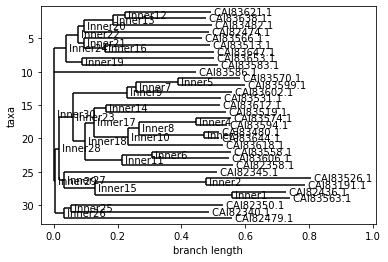

In [7]:
#Draw the Tree
import matplotlib
import matplotlib.pyplot as plt

fig = Phylo.draw(sequence_tree) #drawing the builded tree

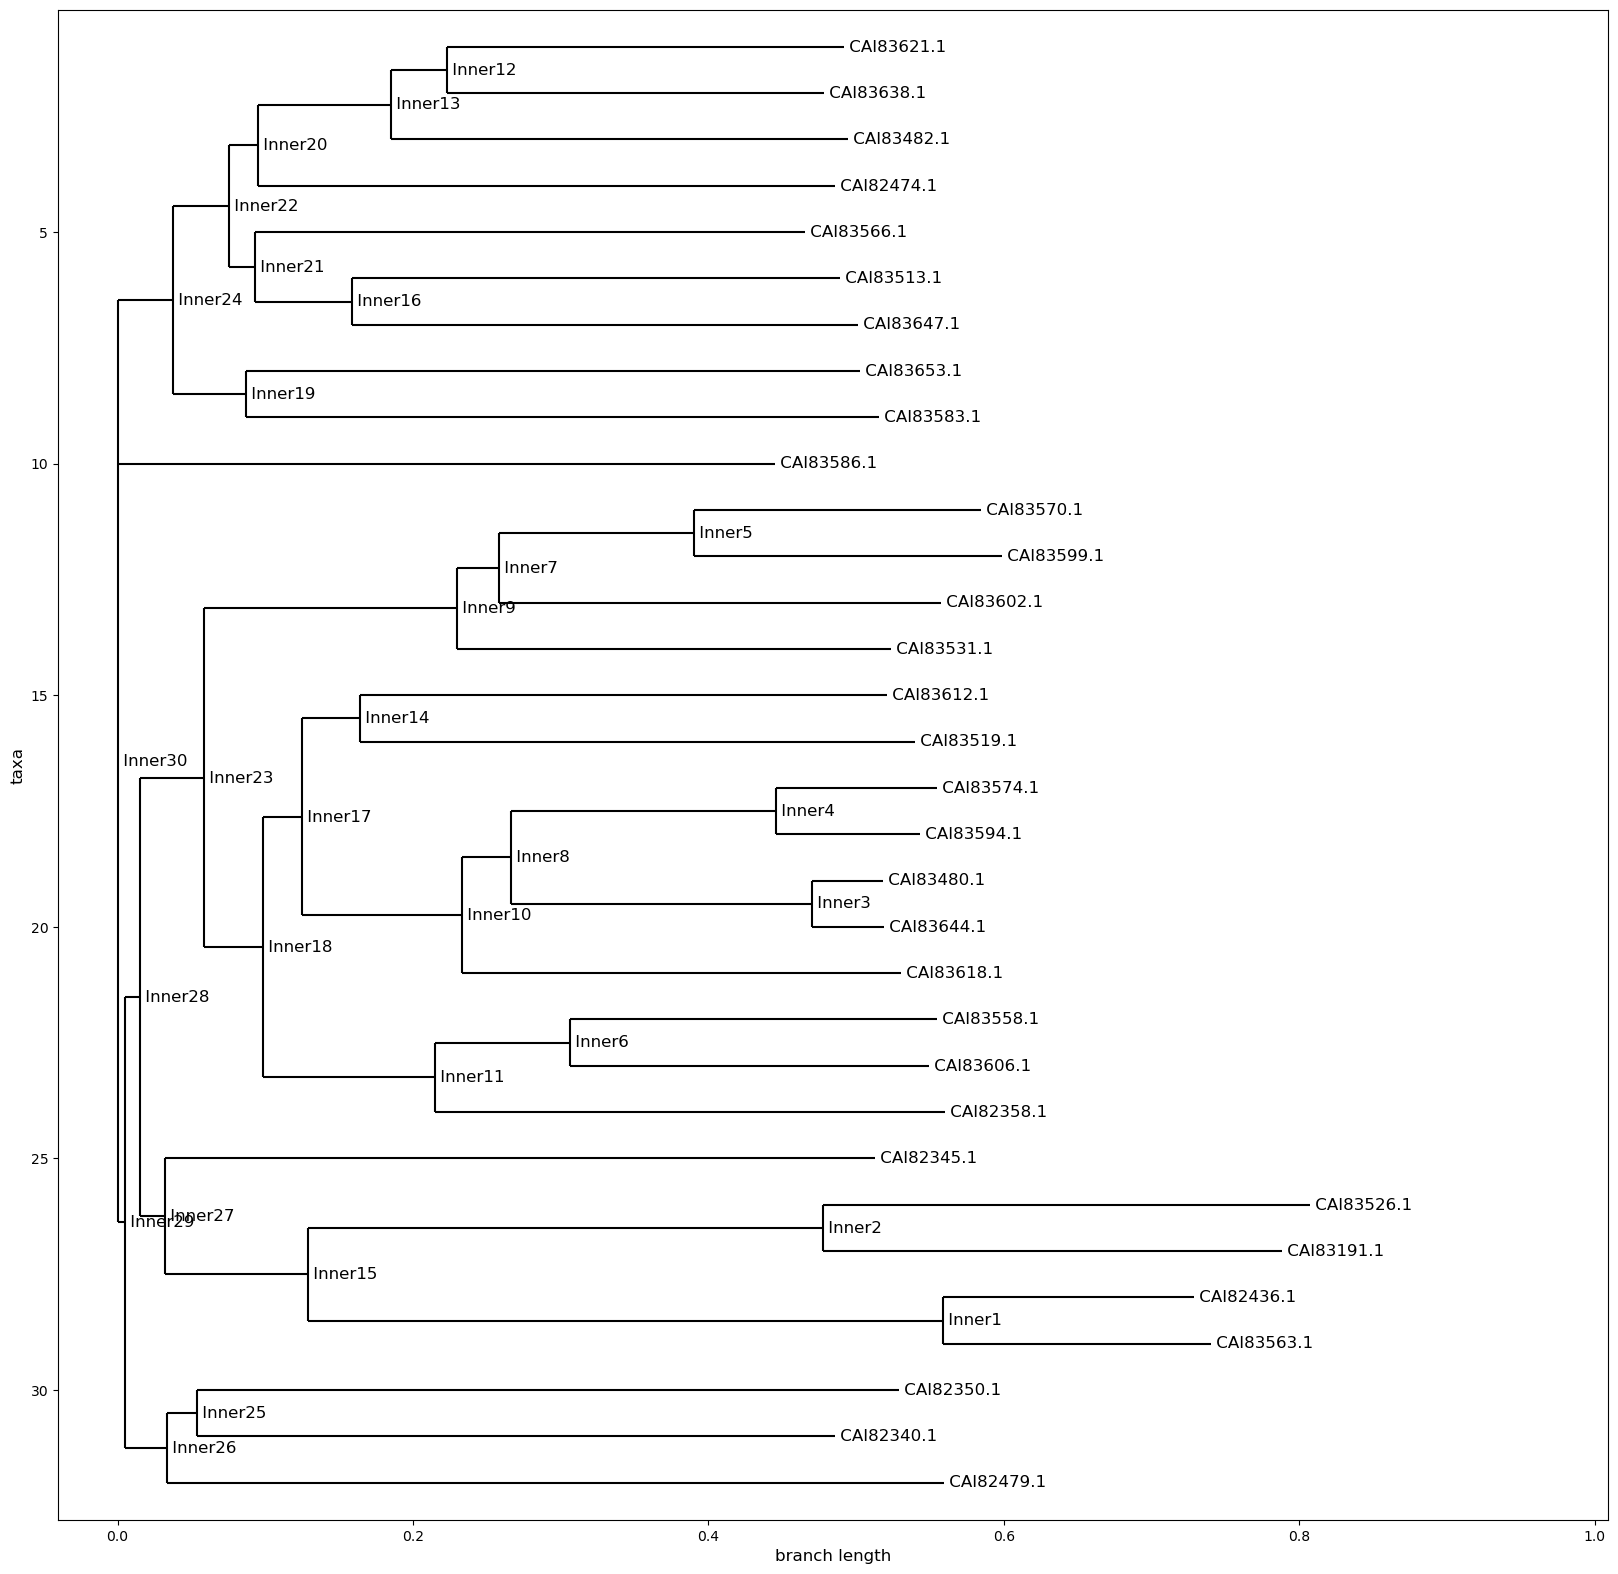

In [30]:
#Adjusting

fig = plt.figure(figsize=(20,20), dpi=100) #figsize: width and height (in inches) ; dpi: how many pixels (default: 100)
matplotlib.rc('font', size=12) #writings' size
matplotlib.rc('xtick', labelsize=10) #x axis' labels' size (0.0-1.0)
matplotlib.rc('ytick', labelsize=10) #y axis' labels' size (30-5)
axes= fig.add_subplot(1,1,1) #exact positioning for axes

Phylo.draw(sequence_tree, axes=axes) #drawing the builded tree in specified way